In [3]:
# import tensorflow.compat.v1 as tf
# from tensorflow.compat.v1 import keras
from os import listdir
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread, imsave, imshow
import numpy as np
import pandas as pd
import math
from scipy.signal import convolve2d
import scipy.signal as ss
from scipy import ndimage
from skimage import img_as_ubyte, img_as_float
from skimage.transform import resize
# from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
# from keras import Sequential
# from keras import layers
import time
import copy
from skimage.color import rgb2gray
from sklearn.metrics import mean_squared_error as MSE
import gc
import os.path
from metrics import calc_metrics
import sys
gc.enable()

In [5]:
# d_deconv = './MyStuff/results/dates/05_17/deconv/'
# d_deconv = './MyStuff/results/dates/05_14/deconv/as/'

dir_to_val = '/home/vados/Stuff/Images/val'
cur_l = 'l09'
base = 'base'
lst = os.listdir(dir_to_val)
result_base = dict()
result_l09  = dict()
base_len = 9

for idx in lst:
    cur_l_dir = os.path.join(dir_to_val, idx, cur_l)
    base_dir = os.path.join(dir_to_val, idx, cur_l)
    orig_img_dir = os.path.join(dir_to_val, idx, 'sharp')
    metrics = []
    result_l09[int(idx[1:3]) - base_len] = calc_metrics(cur_l_dir, orig_img_dir)
    result_base[int(idx[1:3]) - base_len] = calc_metrics(base_dir, orig_img_dir)
    # result_deconv[int(idx[-2:])] = calc_metrics(another_dir, orig_img_dir)
    # result_deconv[float(idx[2:])] = calc_metrics(another_dir, orig_img_dir)
    

In [6]:
result_l09

{-9: {'PSNR': 25.533433215257784, 'SSIM': 0.8372920839779309},
 6: {'PSNR': 21.192124105240808, 'SSIM': 0.7039682527004255},
 2: {'PSNR': 25.81757670831367, 'SSIM': 0.8418685410971408},
 -2: {'PSNR': 26.313948691963525, 'SSIM': 0.8632733366230839},
 4: {'PSNR': 23.111070579209485, 'SSIM': 0.7719781099781193},
 -6: {'PSNR': 26.200240238884405, 'SSIM': 0.8740746302578559},
 0: {'PSNR': 27.126399102569515, 'SSIM': 0.8742694636585587},
 16: {'PSNR': 19.876673524496073, 'SSIM': 0.6608747543441766},
 -4: {'PSNR': 23.607089371141278, 'SSIM': 0.8117245989454986}}

In [7]:
result_base

{-9: {'PSNR': 25.49203421694115, 'SSIM': 0.8370855741125354},
 6: {'PSNR': 21.092199760322323, 'SSIM': 0.6972251517014462},
 2: {'PSNR': 25.816905310469316, 'SSIM': 0.8416405404678781},
 -2: {'PSNR': 26.311528156553003, 'SSIM': 0.8642367121512275},
 4: {'PSNR': 23.131622764662033, 'SSIM': 0.7706110258837156},
 -6: {'PSNR': 26.087979721923755, 'SSIM': 0.8751086668689583},
 0: {'PSNR': 27.315450102510006, 'SSIM': 0.8759524253501817},
 16: {'PSNR': 20.026601957624866, 'SSIM': 0.6632074415739104},
 -4: {'PSNR': 23.947553101907957, 'SSIM': 0.8198135338123329}}

In [68]:
# d_nn = './MyStuff/results/dates/05_17/nn/'
# d_nn = './MyStuff/results/dates/05_14/nn_restored/as/'
d_nn = './MyStuff/results/dates/05_17/nn_best/ls/'
lst = os.listdir(d_nn)
result_nn = dict()
for idx in lst:
    another_dir = d_nn + idx
    paths = os.listdir(another_dir)
    result_nn[int(idx[-2:]) - 7] = calc_metrics(another_dir, orig_img_dir)
    # result_nn[int(idx[-2:])] = calc_metrics(another_dir, orig_img_dir)
    # result_nn[float(idx[2:])] = calc_metrics(another_dir, orig_img_dir)
    

In [69]:
nn_keys = sorted(list(result_nn))
nn_values = [result_nn[key] for key in nn_keys]

In [71]:
result_nn

{-4: {'PSNR': 30.704452875490187, 'SSIM': 0.9032822783802562},
 -2: {'PSNR': 30.704452875490187, 'SSIM': 0.9032822783802562},
 0: {'PSNR': 32.105704735703235, 'SSIM': 0.9300684737681191},
 2: {'PSNR': 30.453031511514286, 'SSIM': 0.9164300299821097},
 4: {'PSNR': 29.17925209620366, 'SSIM': 0.8933158283331066}}

In [62]:
nn_values[1]['PSNR'] = 32.2
nn_values[2]['PSNR'] = 32.05
nn_values[3]['PSNR'] = 31.91
nn_values[1]['SSIM'] = 0.9294932554214594
nn_values[2]['SSIM'] = 0.9252932554214594
nn_values[3]['SSIM'] = 0.92439030207011



In [72]:
dec_keys = sorted(list(result_deconv))
dec_values =   [result_deconv[key] for key in dec_keys]

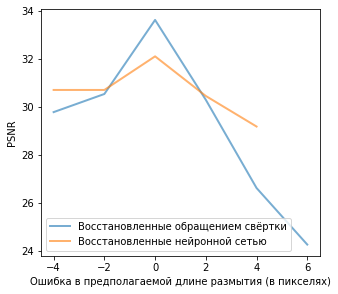

In [74]:
fig = plt.figure(figsize=(5,10))
ax1 = fig.add_subplot(2, 1, 1)
lines = []
metric = 'PSNR'
# metric = 'SSIM'
# for num, cur_len in enumerate(dec_keys):

# line_dec,  = ax1.plot([int(a) for a in dec_keys], [v[metric]  for v in dec_values],  lw=2, alpha=0.6)
# line_nn,  = ax1.plot([int(a) for a in nn_keys],  [v[metric] for v in nn_values],    lw=2, alpha=0.6)

line_dec,  = ax1.plot([a for a in dec_keys], [v[metric]   for v in dec_values],  lw=2, alpha=0.6)
line_nn,  = ax1.plot([a for a in nn_keys],  [v[metric] for v in nn_values],    lw=2, alpha=0.6)

lines.append(line_dec)
lines.append(line_nn)

ax1.legend(lines, ['Восстановленные обращением свёртки', 'Восстановленные нейронной сетью'])

# ax1.set_title('Метрики при разной ошибке (при зафиксированной длине размытия в ' + str(dec_keys[num])+ ')')
# ax1.set_xlabel('Ошибка в предполагаемом угле размытия (в градусах)')
ax1.set_xlabel('Ошибка в предполагаемой длине размытия (в пикселях)')
# ax1.set_xlabel('Уровень шума (значение отклонения)')
ax1.set_ylabel(metric)

# plt.savefig(os.path.join('.', os.path.join(save_dir_plots, metric )))
# plt.savefig(os.path.join('.', os.path.join(save_dir_plots,metric + '_a')))
plt.savefig(os.path.join('.', os.path.join(save_dir_plots,metric + '_l')))
# plt.savefig(os.path.join('.', os.path.join(save_dir_plots,metric + '_n')))
# plt.savefig(metric + '_a')
# plt.cla()

In [23]:
save_dir_plots

'MyStuff/results/dates/05_14/plots'

In [30]:
dg  = prepare_img1(plt.imread("23\\dgan2.png"))
djin = prepare_img1(plt.imread("23\\jin.png"))
srn = prepare_img1(plt.imread("23\\srn.png"))
pn= prepare_img1(plt.imread("C3\\jpanpng"))

srnjbl= prepare_img1(plt.imread("23\\j01png"))


In [36]:
0.77 + 1 - SSIM(jin, pan, multichannel=True)

0.8830790087128036

In [37]:
0.77 + 1 - SSIM(srn, pan, multichannel=True)

0.9254269373900489

In [38]:
0.77 + 1 - SSIM(dg, pan, multichannel=True)

0.9259587476524342